In [135]:
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Datei einlesen (pfad ggf. anpassen)
file_path = "43311-0002_de.csv"
df = pd.read_csv(file_path,  delimiter=';')


# Fill missing Jahr & Monat
df["Jahr"].fillna(method="ffill", inplace=True)
df["Monat"].fillna(method="ffill", inplace=True)
df["Jahr"] = df["Jahr"].astype(int)

# Convert production columns to numeric (ignore 'e', '-', etc.)
df["Elektrizitätserzeugung (brutto)"] = pd.to_numeric(df["Elektrizitätserzeugung (brutto)"], errors='coerce')
df["Elektrizitätserzeugung (netto)"] = pd.to_numeric(df["Elektrizitätserzeugung (netto)"], errors='coerce')

# === Group by Jahr and Typ ===
strommix_df = df.groupby(["Jahr", "Typ"])[["Elektrizitätserzeugung (netto)"]].sum().reset_index()

strommix_df.head(20)

C:\Users\U501450\AppData\Local\Temp\ipykernel_15780\2968988577.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Jahr"].fillna(method="ffill", inplace=True)
C:\Users\U501450\AppData\Local\Temp\ipykernel_15780\2968988577.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Jahr"].fillna(method="ffill", inplace=True)
C:\Users\U501450\AppData\Local\Temp\ipykernel_15780\2968988577.py:13: FutureWarning: A value is trying to be set on

,Jahr,Typ,Elektrizitätserzeugung (netto)
0,2002,"Abfall (Hausmüll, Industrie)",2926818.0
1,2002,"Abfall (Hausmüll, Siedlungsabfälle)",0.0
2,2002,Abfall (Industrie),0.0
3,2002,Andere Speicher,0.0
4,2002,Biogas,30547.0
5,2002,Biomethan (Bioerdgas),0.0
6,2002,Braunkohlenbriketts,41935.0
7,2002,Braunkohlenkoks,0.0
8,2002,Deponiegas,110551.0
9,2002,Dieselkraftstoff,6381.0


In [136]:
# # Austauschsaldo CSV einlesen (lokal bei dir)
# df_saldo = pd.read_csv("43312-0002_de_flat.csv", sep=";")

# # Filter auf 'Deutschland insgesamt' & 'Insgesamt' & 'Austauschsaldo'
# df_saldo_filtered = df_saldo[
#     # (df_saldo["2_variable_label"] == "Deutschland") &
#     # (df_saldo["3_variable_label"] == "Insgesamt") &
#     (df_saldo["3_variable_attribute_label"] == "Insgesamt") &
#     (df_saldo["value_variable_label"] == "Austauschsaldo")
# ]
# #3_variable_attribute_label

# # Umwandeln der Zeitspalte in int
# df_saldo_filtered["Jahr"] = df_saldo_filtered["time"].astype(int)

# df_saldo_filtered["Austauschsaldo"] = pd.to_numeric(
#     df_saldo_filtered["value"]
#     .astype(str)
#     .str.replace(".", "", regex=False)
#     .str.replace(",", ".", regex=False),
#     errors="coerce"
# ).astype("Int64")  # erlaubt auch NA


# # Gruppieren wie im Strommix
# grouped_saldo = (
#     df_saldo_filtered.groupby("Jahr")["Austauschsaldo"]
#     .sum()
#     .reset_index()
# )

# grouped_saldo = grouped_saldo.rename(columns={"value": "Austauschssaldo"})

# austauschsaldo = grouped_saldo[(grouped_saldo["Jahr"] >= 2002) & (grouped_saldo["Jahr"] <= 2024)]

# austauschsaldo

import pandas as pd

# CSV einlesen
df_saldo = pd.read_csv("43312-0002_de_flat.csv", sep=";")

# Filter: Deutschland insgesamt + Insgesamt
df_saldo_filtered = df_saldo[
    (df_saldo["3_variable_attribute_label"] == "Insgesamt")
]

# Jahr als int
df_saldo_filtered["Jahr"] = df_saldo_filtered["time"].astype(int)

# Werte konvertieren (Zahlen sauber parsen)
df_saldo_filtered["value"] = pd.to_numeric(
    df_saldo_filtered["value"]
    .astype(str)
    .str.replace(".", "", regex=False)
    .str.replace(",", ".", regex=False),
    errors="coerce"
)

# Gruppieren: Jahr + Typ (value_variable_label) und Werte summieren
grouped = (
    df_saldo_filtered
    .groupby(["Jahr", "value_variable_label"])["value"]
    .sum()
    .reset_index()
)

# Spalten passend umbenennen
grouped = grouped.rename(columns={
    "value_variable_label": "Typ",
    "value": "Elektrizitätserzeugung (netto)"
})

# Zeitraum 2002–2024 filtern
austauschsaldo = grouped[(grouped["Jahr"] >= 2002) & (grouped["Jahr"] <= 2024)]

# Ausgabe
print(austauschsaldo)


     Jahr                       Typ  Elektrizitätserzeugung (netto)
36   2002  Ausfuhr von Elektrizität                      44463109.0
37   2002            Austauschsaldo                       6628002.0
38   2002  Einfuhr von Elektrizität                      51091111.0
39   2003  Ausfuhr von Elektrizität                      52379313.0
40   2003            Austauschsaldo                      -3269564.0
..    ...                       ...                             ...
100  2023            Austauschsaldo                       9175369.0
101  2023  Einfuhr von Elektrizität                      69306080.0
102  2024  Ausfuhr von Elektrizität                      55389299.0
103  2024            Austauschsaldo                      26323839.0
104  2024  Einfuhr von Elektrizität                      81658124.0

[69 rows x 3 columns]


C:\Users\U501450\AppData\Local\Temp\ipykernel_15780\4038110138.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_saldo_filtered["Jahr"] = df_saldo_filtered["time"].astype(int)
C:\Users\U501450\AppData\Local\Temp\ipykernel_15780\4038110138.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_saldo_filtered["value"] = pd.to_numeric(


In [137]:
# Austauschsaldo (jetzt result) ist schon in der richtigen Struktur!

# Umbenennen auf austauschsaldo_long (optional, aber für Klarheit)
austauschsaldo_long = austauschsaldo.copy()

# Kombinieren beider DataFrames
strommix_gesamt = pd.concat([strommix_df, austauschsaldo_long], ignore_index=True)

# Tipp: Typen ggf. von überflüssigen Leerzeichen befreien (hast du unten schon gemerkt)
strommix_gesamt["Typ"] = strommix_gesamt["Typ"].str.strip()

# 'Insgesamt' rausfiltern
strommix_gesamt = strommix_gesamt[strommix_gesamt["Typ"] != "Insgesamt"]

# Test: Ausgabe sortiert
strommix_gesamt[strommix_gesamt["Jahr"] == 2022].sort_values("Jahr")


,Jahr,Typ,Elektrizitätserzeugung (netto)
1040,2022,"Abfall (Hausmüll, Industrie)",0.0
1041,2022,"Abfall (Hausmüll, Siedlungsabfälle)",8248923.0
1042,2022,Abfall (Industrie),368800.0
1043,2022,Andere Speicher,0.0
1044,2022,Biogas,2662856.0
1045,2022,Biomethan (Bioerdgas),1007771.0
1046,2022,Braunkohlenbriketts,11437.0
1047,2022,Braunkohlenkoks,0.0
1048,2022,Deponiegas,56080.0
1049,2022,Dieselkraftstoff,130.0


In [138]:
import json

# Load JSON file
with open("bruttostromerzeugung-energieträger.json", "r", encoding="utf-8") as f:
    brutto_data = json.load(f)

# Existing years in the database
valid_years = set(strommix_gesamt["Jahr"].unique())

# Extract only Windkraft and Photovoltaik entries
zusatz_daten = {
    "Windkraft": brutto_data.get("Wind", {}),
    "Photovoltaik": brutto_data.get("Photovoltaik", {})
}

# Collect valid records
records = []
for typ, jahresdaten in zusatz_daten.items():
    for jahr, value in jahresdaten.items():
        try:
            jahr_int = int(jahr)
            if jahr_int in valid_years and value and value.strip():
                value_float = float(value.replace(",", "."))
                records.append({
                    "Jahr": jahr_int,
                    "Typ": typ,
                    "Elektrizitätserzeugung (netto)": value_float * 1_000_000  # TWh → MWh
                })
        except ValueError:
            continue  # skip malformed entries

df_zusatz = pd.DataFrame(records)

# Remove existing entries for these types to avoid duplicates
strommix_gesamt = strommix_gesamt[
    ~strommix_gesamt["Typ"].isin(["Windkraft", "Photovoltaik"])
]

# Add the new data
strommix_gesamt = pd.concat([strommix_gesamt, df_zusatz], ignore_index=True)

# Json is missing 2024 data
zusatz_2024 = pd.DataFrame([
    {"Jahr": 2024, "Typ": "Windkraft", "Elektrizitätserzeugung (netto)": 138_900_000},
    {"Jahr": 2024, "Typ": "Photovoltaik", "Elektrizitätserzeugung (netto)": 74_100_000}
])

# Anfügen
strommix_gesamt = pd.concat([strommix_gesamt, zusatz_2024], ignore_index=True)

# Check result
strommix_gesamt[strommix_gesamt["Typ"].isin(["Windkraft", "Photovoltaik"])].sort_values(["Typ", "Jahr"])



,Jahr,Typ,Elektrizitätserzeugung (netto)
1218,2002,Photovoltaik,200000.0
1219,2003,Photovoltaik,300000.0
1220,2004,Photovoltaik,600000.0
1221,2005,Photovoltaik,1300000.0
1222,2006,Photovoltaik,2200000.0
1223,2007,Photovoltaik,3100000.0
1224,2008,Photovoltaik,4400000.0
1225,2009,Photovoltaik,6600000.0
1226,2010,Photovoltaik,11700000.0
1227,2011,Photovoltaik,19600000.0


In [139]:
# Jährliche Summe der Elektrizitätserzeugung (netto)
jahres_summen = strommix_gesamt.groupby("Jahr")["Elektrizitätserzeugung (netto)"].sum().reset_index()

# MWh → TWh umrechnen zur besseren Lesbarkeit
jahres_summen["Elektrizität (TWh)"] = jahres_summen["Elektrizitätserzeugung (netto)"] / 1_000_000

# Ergebnis anzeigen
jahres_summen = jahres_summen[["Jahr", "Elektrizität (TWh)"]].sort_values("Jahr")
display(jahres_summen)


,Jahr,Elektrizität (TWh)
0,2002,601.767939
1,2003,615.199062
2,2004,620.999162
3,2005,639.422624
4,2006,634.410787
5,2007,622.628033
6,2008,616.454994
7,2009,582.200032
8,2010,613.636140
9,2011,610.041435


In [140]:
# Mapping
typ_to_category = {
    # Fossile Brennstoffe
    "Braunkohlenbriketts": "Braunkohle",
    "Braunkohlenkoks": "Braunkohle",
    "Rohbraunkohlen": "Braunkohle",
    "Sonstige Braunkohlen": "Braunkohle",
    "Hartbraunkohlen": "Braunkohle",

    "Steinkohlen": "Steinkohle",
    "Steinkohlenbriketts": "Steinkohle",
    "Steinkohlenkoks": "Steinkohle",
    "Kohlenwertstoffe aus Steinkohle": "Steinkohle",
    "Sonstige Steinkohlen": "Steinkohle",
    "Staub- und Trockenkohle": "Steinkohle",
    "Wirbelschichtkohle": "Steinkohle",

    "Dieselkraftstoff": "Mineralöl",
    "Heizöl, leicht": "Mineralöl",
    "Heizöl, schwer": "Mineralöl",
    "Petrolkoks": "Mineralöl",
    "Raffineriegas": "Mineralöl",
    "Sonstige Mineralölprodukte": "Mineralöl",

    "Erdgas, Erdölgas": "Erdgas",
    "Flüssiggas": "Erdgas",

    "Hochofengas": "Industriegas",
    "Kokereigas": "Industriegas",
    "Sonstige hergestellte Gase": "Industriegas",

    # Erneuerbare
    "Photovoltaik": "Solar",
    "Solarthermie": "Solar",

    "Laufwasser": "Wasserkraft",
    "Pumpspeicherwasser": "Wasserkraft",
    "Pumpspeicher mit natürlichem Zufluss": "Wasserkraft",
    "Pumpspeicher ohne natürlichen Zufluss": "Wasserkraft",
    "Speicherwasser": "Wasserkraft",

    "Windkraft": "Wind",

    "Feste biogene Stoffe": "Biomasse",
    "Flüssige biogene Stoffe": "Biomasse",
    "Biogas": "Biomasse",
    "Biomethan (Bioerdgas)": "Biomasse",
    "Deponiegas": "Biomasse",
    "Klärgas": "Biomasse",
    "Klärschlamm": "Biomasse",
    "Grubengas": "Biomasse",

    "Geothermie": "Geothermie",
    "Wärmepumpen (Erd- und Umweltwärme)": "Geothermie",

    "Sonstige erneuerbare Energien": "Andere Erneuerbare",

    # Abfall
    "Abfall (Hausmüll, Industrie)": "Abfall",
    "Abfall (Hausmüll, Siedlungsabfälle)": "Abfall",
    "Abfall (Industrie)": "Abfall",

    # import / export
    "Einfuhr von Elektrizität": "Import",
    "Ausfuhr von Elektrizität": "Export",


    # Sonstige
    "Kernenergie": "Kernenergie",

    "Austauschsaldo": "Import/Export",

    "Strom (Elektrokessel)": "Sonstiges",
    "Andere Speicher": "Sonstiges",
    "Wasserstoff": "Wasserstoff", # todo make it be it's own category
    "Wärme": "Sonstiges",
    "Sonstige Energieträger": "Sonstiges",

    #
    "Insgesamt": "SUMME"
}

strommix_gesamt["Kategorie"] = strommix_gesamt["Typ"].map(typ_to_category).fillna("Unbekannt")

# Unbekannte debugging
# unbekannte_typen = strommix_gesamt[strommix_gesamt["Kategorie"] == "Unbekannt"]["Typ"].unique()
# pd.DataFrame({"Unbekannte Typen": sorted(unbekannte_typen)})

# TL Categories
TOP_LEVEL_CATEGORIES = sorted(set(typ_to_category.values()))
print(TOP_LEVEL_CATEGORIES)




strommix_gesamt[strommix_gesamt['Jahr'] == 2002].sort_values('Kategorie')



['Abfall', 'Andere Erneuerbare', 'Biomasse', 'Braunkohle', 'Erdgas', 'Export', 'Geothermie', 'Import', 'Import/Export', 'Industriegas', 'Kernenergie', 'Mineralöl', 'SUMME', 'Solar', 'Sonstiges', 'Steinkohle', 'Wasserkraft', 'Wasserstoff', 'Wind']


,Jahr,Typ,Elektrizitätserzeugung (netto),Kategorie
0,2002,"Abfall (Hausmüll, Industrie)",2926818.0,Abfall
1,2002,"Abfall (Hausmüll, Siedlungsabfälle)",0.0,Abfall
2,2002,Abfall (Industrie),0.0,Abfall
37,2002,Sonstige erneuerbare Energien,243469.0,Andere Erneuerbare
4,2002,Biogas,30547.0,Biomasse
5,2002,Biomethan (Bioerdgas),0.0,Biomasse
8,2002,Deponiegas,110551.0,Biomasse
22,2002,Klärschlamm,51438.0,Biomasse
11,2002,Feste biogene Stoffe,201651.0,Biomasse
12,2002,Flüssige biogene Stoffe,0.0,Biomasse


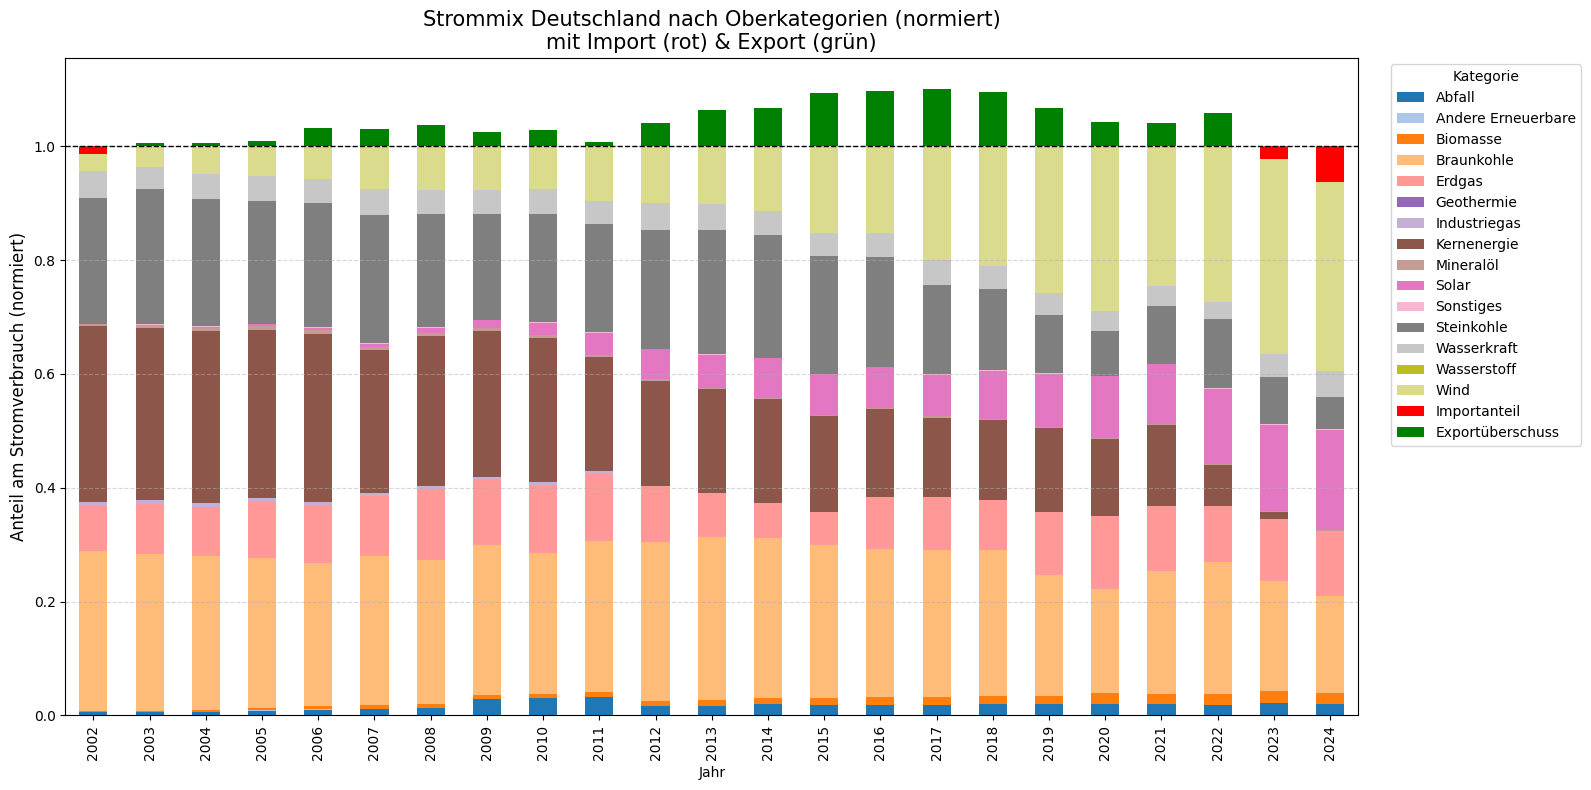

In [141]:
# Nur Typen außer 'Insgesamt'

# df_clean = strommix_gesamt[strommix_gesamt["Typ"] != "Insgesamt"]

df_clean = strommix_gesamt[
    ~strommix_gesamt["Typ"].isin(["Einfuhr von Elektrizität", "Ausfuhr von Elektrizität"])
    & (strommix_gesamt["Typ"] != "Insgesamt")
]

# 1. Summe aller Typen (ohne Austauschsaldo)
produktion = df_clean[df_clean["Typ"] != "Austauschsaldo"]
produktion_summe = produktion.groupby("Jahr")["Elektrizitätserzeugung (netto)"].sum().reset_index()
produktion_summe = produktion_summe.rename(columns={"Elektrizitätserzeugung (netto)": "Inlandsproduktion"})

# 2. Austauschsaldo (positiv = Import, negativ = Export)
saldo = df_clean[df_clean["Typ"] == "Austauschsaldo"][["Jahr", "Elektrizitätserzeugung (netto)"]]
saldo = saldo.rename(columns={"Elektrizitätserzeugung (netto)": "Austauschsaldo"})

# 3. Zusammenführen
basis = produktion_summe.merge(saldo, on="Jahr", how="left").fillna(0)

# 4. Berechne Kategorie-Anteile (inkl. Import!)
produktion_rel = produktion.merge(basis, on="Jahr")
produktion_rel["Anteil"] = produktion_rel["Elektrizitätserzeugung (netto)"] / (
    produktion_rel["Inlandsproduktion"] + produktion_rel["Austauschsaldo"].clip(lower=0)
)

# 5. Gruppieren nach Kategorie
produktion_kat = produktion_rel.groupby(["Jahr", "Kategorie"])["Anteil"].sum().reset_index()

# 6. Importanteil (innerhalb der 100%)
import_df = basis[basis["Austauschsaldo"] > 0].copy()
import_df["Anteil"] = import_df["Austauschsaldo"] / (import_df["Inlandsproduktion"] + import_df["Austauschsaldo"])
import_df["Kategorie"] = "Importanteil"

# 7. Exportüberschuss (oberhalb der 100%)
export_df = basis[basis["Austauschsaldo"] < 0].copy()
export_df["Anteil"] = -export_df["Austauschsaldo"] / export_df["Inlandsproduktion"]
export_df["Kategorie"] = "Exportüberschuss"

# 8. Zusammenführen für den Plot
df_plot_ready = pd.concat([
    produktion_kat[["Jahr", "Kategorie", "Anteil"]],
    import_df[["Jahr", "Kategorie", "Anteil"]],
    export_df[["Jahr", "Kategorie", "Anteil"]],
])

# 9. Pivot + Sortierung: Exportüberschuss zuletzt
pivot_plot = df_plot_ready.pivot_table(
    index="Jahr",
    columns="Kategorie",
    values="Anteil",
    aggfunc="sum"
).fillna(0)

# Sortiere Spalten: Export & Import ans Ende
cols = list(pivot_plot.columns)
for special in ["Importanteil", "Exportüberschuss"]:
    if special in cols:
        cols = [c for c in cols if c != special] + [special]
pivot_plot = pivot_plot[cols]

# 10. Plot

# Farbzuweisung: Standardfarben für alle Kategorien außer Import/Export
tab20_colors = plt.get_cmap("tab20").colors
safe_colors = [c for i, c in enumerate(tab20_colors) if i not in [4,5,6]]
categories = list(pivot_plot.columns)

# Farbzuordnung: rot für Import, grün für Export
color_map = {}
for i, cat in enumerate(categories):
    if cat == "Importanteil":
        color_map[cat] = "red"
    elif cat == "Exportüberschuss":
        color_map[cat] = "green"
    else:
        color_map[cat] = safe_colors[i % len(safe_colors)]

# Farben in der korrekten Reihenfolge als Liste
colors = [color_map[cat] for cat in categories]

# Plot mit benutzerdefinierten Farben
pivot_plot.plot(
    kind="bar",
    stacked=True,
    figsize=(16, 8),
    color=colors
)

plt.axhline(1, color='black', linestyle='--', linewidth=1)  # 100%-Linie
plt.title("Strommix Deutschland nach Oberkategorien (normiert)\nmit Import (rot) & Export (grün)", fontsize=15)
plt.ylabel("Anteil am Stromverbrauch (normiert)", fontsize=12)
plt.xlabel("Jahr")
plt.legend(title="Kategorie", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



In [142]:
# TABLE EXPORT


# Pivotiere die Tabelle: Jahre = Zeilen, Kategorien = Spalten
strommix_wide = strommix_gesamt.pivot_table(
    index=["Kategorie", "Typ"],
    columns="Jahr",
    values="Elektrizitätserzeugung (netto)",
).fillna(0)

# strommix_wide["Unit"] = "MWh"
strommix_wide.insert(0, "Unit", "MWh")
# strommix_wide = strommix_wide.drop('Typ')

# Index resetten für Export
strommix_wide = strommix_wide.reset_index()


# strommix_wide.to_excel("strommix_wide.xlsx", index=False)
with pd.ExcelWriter("strommix_formatiert.xlsx", engine='xlsxwriter') as writer:
    strommix_wide.to_excel(writer, sheet_name='Strommix', index=False)

    workbook  = writer.book
    worksheet = writer.sheets['Strommix']

    # 1st column (JAHR)
    worksheet.set_column(0, 3, 16, workbook.add_format({
        'bold': True,
        'align': 'left'
    }))

    # Data columns
    worksheet.set_column(3, strommix_wide.shape[1], 20, workbook.add_format({
        'align': 'left'
    }))

    # Header formattierung
    header_format = workbook.add_format({'bold': True, 'bg_color': '#D9D9D9'})
    worksheet.set_row(0, 16, header_format)
    # for col_num, value in enumerate(strommix_wide.columns.values):
    #     worksheet.write(0, col_num, value, header_format)


strommix_wide.head(20)


Jahr,Kategorie,Typ,Unit,2002,2003,2004,2005,2006,2007,2008,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Abfall,"Abfall (Hausmüll, Industrie)",MWh,2926818.0,3182945.0,3094261.0,4524205.0,5523466.0,6398662.0,7049002.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Abfall,"Abfall (Hausmüll, Siedlungsabfälle)",MWh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8678621.0,9003436.0,9103612.0,9368342.0,8807724.0,8806724.0,8559383.0,8248923.0,8426706.0,8103057.0
2,Abfall,Abfall (Industrie),MWh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,822492.0,942120.0,864336.0,532107.0,546308.0,394625.0,375927.0,368800.0,337381.0,302544.0
3,Andere Erneuerbare,Sonstige erneuerbare Energien,MWh,243469.0,146692.0,193418.0,501970.0,364129.0,20829.0,434.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Biomasse,Biogas,MWh,30547.0,16499.0,18696.0,17191.0,10830.0,41389.0,56019.0,...,1656879.0,1730984.0,1757636.0,1776954.0,1909288.0,2177331.0,2305019.0,2662856.0,2628872.0,2564677.0
5,Biomasse,Biomethan (Bioerdgas),MWh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,766717.0,786940.0,904378.0,1036391.0,1007771.0,936420.0,868105.0
6,Biomasse,Deponiegas,MWh,110551.0,118181.0,180303.0,201636.0,183550.0,169709.0,153170.0,...,83700.0,72410.0,67784.0,53825.0,54243.0,70880.0,62707.0,56080.0,53592.0,58672.0
7,Biomasse,Feste biogene Stoffe,MWh,201651.0,255228.0,675774.0,1542493.0,1726401.0,2100075.0,2635180.0,...,4376181.0,4682300.0,4703454.0,4621836.0,4365482.0,4441567.0,4215786.0,4555379.0,4314766.0,4074438.0
8,Biomasse,Flüssige biogene Stoffe,MWh,0.0,0.0,0.0,17864.0,36419.0,57463.0,52248.0,...,890.0,0.0,1013.0,0.0,0.0,3449.0,0.0,0.0,0.0,0.0
9,Biomasse,Grubengas,MWh,215765.0,286779.0,313046.0,377588.0,488123.0,501313.0,387442.0,...,0.0,134240.0,78413.0,138398.0,82699.0,716510.0,606925.0,577320.0,501442.0,486810.0


In [134]:
# Define allowed categories (whitelist)
include_kategorien = ['Abfall', 'Biomasse', 'Braunkohle', 'Erdgas', 
                      'Geothermie', 'Industriegas', 'Kernenergie', 
                      'Mineralöl', 'Solar', 'Sonstiges', 'Steinkohle', 
                      'Wasserkraft', 'Wind', 'Wasserstoff', 'Import', 'Export']

# Step 0: Filter to only included categories
strommix_filtered = strommix_gesamt[strommix_gesamt["Kategorie"].isin(include_kategorien)]

# Step 1: Sum by Kategorie and Jahr
strommix_for_prophet = (
    strommix_filtered
    .groupby(["Kategorie", "Jahr"], as_index=False)
    .agg({"Elektrizitätserzeugung (netto)": "sum"})
)

# Step 2: Rename for Prophet compatibility
strommix_for_prophet = strommix_for_prophet.rename(columns={
    "Jahr": "ds",
    "Elektrizitätserzeugung (netto)": "y"
})

# Step 3: Convert year to datetime (Prophet requires actual datetime)
strommix_for_prophet["ds"] = pd.to_datetime(strommix_for_prophet["ds"], format="%Y")

# Inbetween to print the included categories in the data
included_categories_test = sorted(strommix_for_prophet["Kategorie"].unique())
print(f"Prophet Kategorien: {', '.join(included_categories_test)}")
ignorierte_kategorien = [cat for cat in TOP_LEVEL_CATEGORIES if cat not in included_categories_test]

print(f"Ignorierte Kategorien: {', '.join(ignorierte_kategorien)}")
print(f"Es sind {len(included_categories_test)} from {len(include_kategorien)} that are allowed from {len(TOP_LEVEL_CATEGORIES)} total.")


# Step 4 (Optional): Check one example
strommix_for_prophet


Prophet Kategorien: Abfall, Biomasse, Braunkohle, Erdgas, Export, Geothermie, Import, Industriegas, Kernenergie, Mineralöl, Solar, Sonstiges, Steinkohle, Wasserkraft, Wasserstoff, Wind
Ignorierte Kategorien: Andere Erneuerbare, Import/Export, SUMME
Es sind 16 from 16 that are allowed from 19 total.


,Kategorie,ds,y
0,Abfall,2002-01-01,2926818.0
1,Abfall,2003-01-01,3182945.0
2,Abfall,2004-01-01,3094261.0
3,Abfall,2005-01-01,4524205.0
4,Abfall,2006-01-01,5523466.0
...,...,...,...
363,Wind,2020-01-01,129600000.0
364,Wind,2021-01-01,112500000.0
365,Wind,2022-01-01,124800000.0
366,Wind,2023-01-01,137800000.0


In [143]:
from prophet import Prophet


# Define target forecast years
forecast_years = [2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060]
future_dates = pd.DataFrame({'ds': pd.to_datetime([f'{year}-01-01' for year in forecast_years])})

# Store all forecasts
all_forecasts = []

# Loop over each Kategorie
for category in strommix_for_prophet['Kategorie'].unique():
    # Filter data for the current category
    df_cat = strommix_for_prophet[strommix_for_prophet['Kategorie'] == category][['ds', 'y']].copy()
    df_cat['ds'] = pd.to_datetime(df_cat['ds'])

    # Skip if all values are zero or missing
    if df_cat['y'].sum() == 0 or df_cat['y'].isna().all():
        continue

    # Fit Prophet model
    model = Prophet(yearly_seasonality=False, daily_seasonality=False, weekly_seasonality=False)
    model.fit(df_cat)

    # Predict for future years
    forecast = model.predict(future_dates)
    forecast['Kategorie'] = category
    if("Import" not in category):
        forecast['yhat'] = forecast['yhat'].clip(lower=0)  # clip to avoid negative energy values

    forecast_result = forecast[['ds', 'yhat', 'Kategorie']]

    all_forecasts.append(forecast_result)

# Combine all category forecasts
final_forecast_df = pd.concat(all_forecasts, ignore_index=True)


08:26:26 - cmdstanpy - INFO - Chain [1] start processing
08:26:27 - cmdstanpy - INFO - Chain [1] done processing
08:26:27 - cmdstanpy - INFO - Chain [1] start processing
08:26:27 - cmdstanpy - INFO - Chain [1] done processing
08:26:27 - cmdstanpy - INFO - Chain [1] start processing
08:26:27 - cmdstanpy - INFO - Chain [1] done processing
08:26:28 - cmdstanpy - INFO - Chain [1] start processing
08:26:28 - cmdstanpy - INFO - Chain [1] done processing
08:26:28 - cmdstanpy - INFO - Chain [1] start processing
08:26:28 - cmdstanpy - INFO - Chain [1] done processing
08:26:28 - cmdstanpy - INFO - Chain [1] start processing
08:26:28 - cmdstanpy - INFO - Chain [1] done processing
08:26:28 - cmdstanpy - INFO - Chain [1] start processing
08:26:28 - cmdstanpy - INFO - Chain [1] done processing
08:26:29 - cmdstanpy - INFO - Chain [1] start processing
08:26:29 - cmdstanpy - INFO - Chain [1] done processing
08:26:29 - cmdstanpy - INFO - Chain [1] start processing
08:26:29 - cmdstanpy - INFO - Chain [1]

In [95]:
# # Step 1: Prepare import/export data
# austausch_df = strommix_gesamt[strommix_gesamt["Typ"] == "Austauschsaldo"].copy()
# austausch_df = austausch_df[["Jahr", "Elektrizitätserzeugung (netto)"]].rename(
#     columns={"Jahr": "ds", "Elektrizitätserzeugung (netto)": "y"}
# )
# austausch_df["ds"] = pd.to_datetime(austausch_df["ds"], format="%Y")

# # Step 2: Create future dates frame
# future_dates_saldo = pd.DataFrame({
#     "ds": pd.to_datetime([f"{year}-01-01" for year in forecast_years if year > austausch_df["ds"].dt.year.max()])
# })

# # Step 3: Prophet model for Austauschsaldo
# saldo_model = Prophet(yearly_seasonality=False, daily_seasonality=False, weekly_seasonality=False)
# saldo_model.fit(austausch_df)

# # Step 4: Predict
# saldo_forecast = saldo_model.predict(future_dates_saldo)
# saldo_forecast = saldo_forecast[["ds", "yhat"]]
# saldo_forecast["Typ"] = "Austauschsaldo"
# saldo_forecast = saldo_forecast.rename(columns={"yhat": "Elektrizitätserzeugung (netto)"})

# # Step 5: Combine back with historical saldo
# saldo_historical = austausch_df.rename(columns={"y": "Elektrizitätserzeugung (netto)"})
# saldo_historical["Typ"] = "Austauschsaldo"

# saldo_total = pd.concat([
#     saldo_historical[["ds", "Typ", "Elektrizitätserzeugung (netto)"]],
#     saldo_forecast
# ], ignore_index=True)

# # Optional preview
# saldo_total["Jahr"] = saldo_total["ds"].dt.year
# saldo_total = saldo_total[saldo_total["Jahr"].isin(forecast_years)].sort_values("ds")
# display(saldo_total)


In [144]:
import matplotlib.pyplot as plt

# Merge original and forecasted data for unified plotting
original = strommix_for_prophet.copy()
original['ds'] = pd.to_datetime(original['ds'])
original['Type'] = 'Historisch'
original = original.rename(columns={'y': 'value'})

forecast = final_forecast_df.copy()
forecast['Type'] = 'Prognose'
forecast = forecast.rename(columns={'yhat': 'value'})

# Combine both
combined = pd.concat([
    original[['Kategorie', 'ds', 'value', 'Type']],
    forecast[['Kategorie', 'ds', 'value', 'Type']]
])

# include_saldo_forecast = False  # Set to False to exclude Import/Export forecast

# if include_saldo_forecast:
#     # Prepare historical saldo from existing data
#     historical_saldo = strommix_for_prophet[strommix_for_prophet["Kategorie"] == "Austauschsaldo"].copy()
#     historical_saldo["Kategorie"] = "Import / Export"
#     historical_saldo["Type"] = "Historisch"
#     historical_saldo = historical_saldo.rename(columns={"y": "value"})
#     historical_saldo = historical_saldo[["Kategorie", "ds", "value", "Type"]]

#     # Prepare forecast saldo
#     saldo_forecast = saldo_total.copy()
#     saldo_forecast["Kategorie"] = "Import / Export"
#     saldo_forecast["Type"] = "Prognose"
#     saldo_forecast = saldo_forecast.rename(columns={"Elektrizitätserzeugung (netto)": "value"})
#     saldo_forecast = saldo_forecast[["Kategorie", "ds", "value", "Type"]]

#     # Combine both historical + forecast saldo
#     saldo_combined = pd.concat([historical_saldo, saldo_forecast], ignore_index=True)

#     # Add to combined
#     combined = pd.concat([combined, saldo_combined], ignore_index=True)


combined[combined['ds'] == '2020-01-01']

,Kategorie,ds,value,Type
18,Abfall,2020-01-01,9201349.0,Historisch
41,Biomasse,2020-01-01,8443037.0,Historisch
64,Braunkohle,2020-01-01,82127603.0,Historisch
87,Erdgas,2020-01-01,57096199.0,Historisch
110,Export,2020-01-01,66930968.0,Historisch
133,Geothermie,2020-01-01,0.0,Historisch
156,Import,2020-01-01,48046985.0,Historisch
179,Industriegas,2020-01-01,0.0,Historisch
202,Kernenergie,2020-01-01,60914325.0,Historisch
225,Mineralöl,2020-01-01,650776.0,Historisch


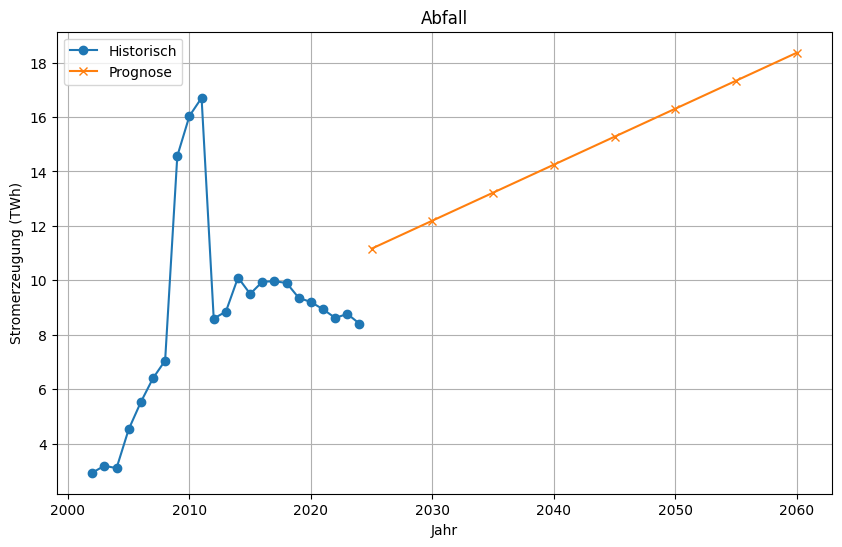

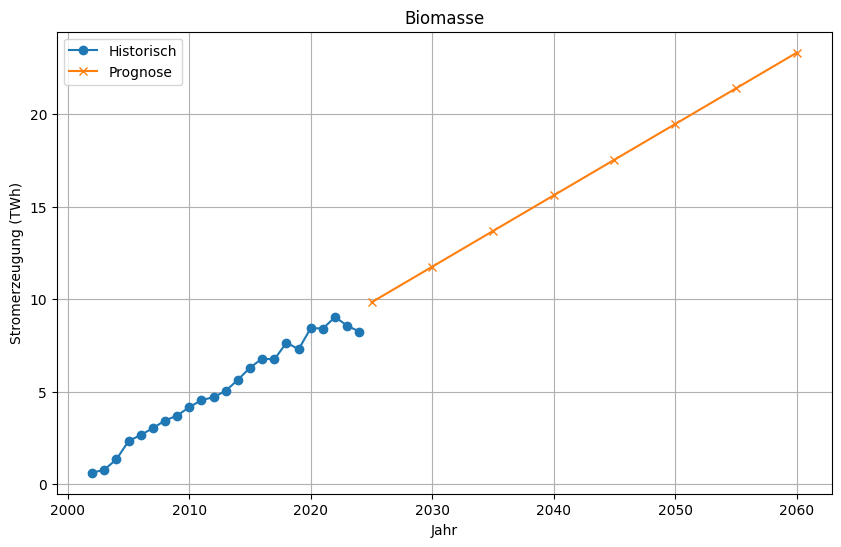

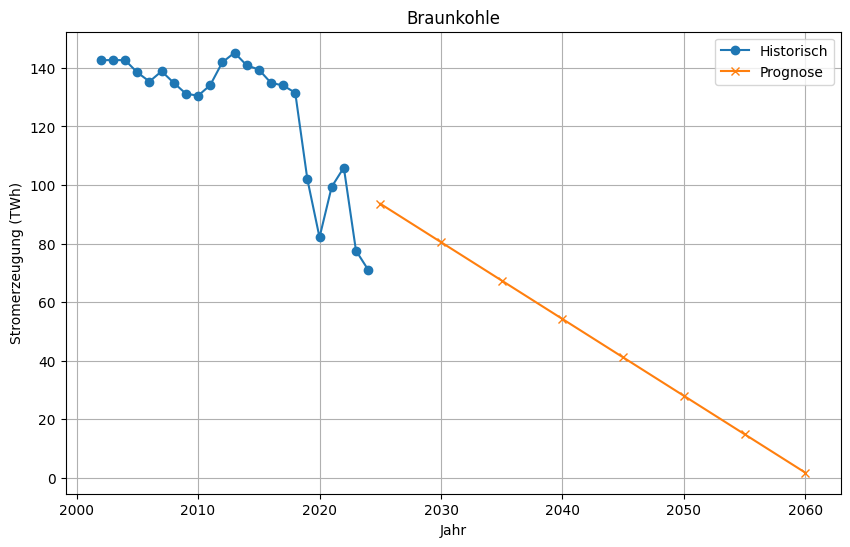

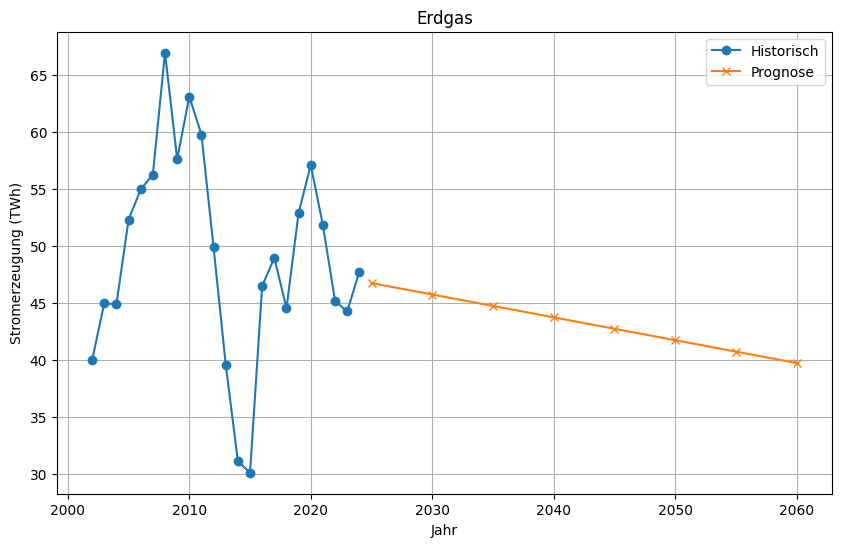

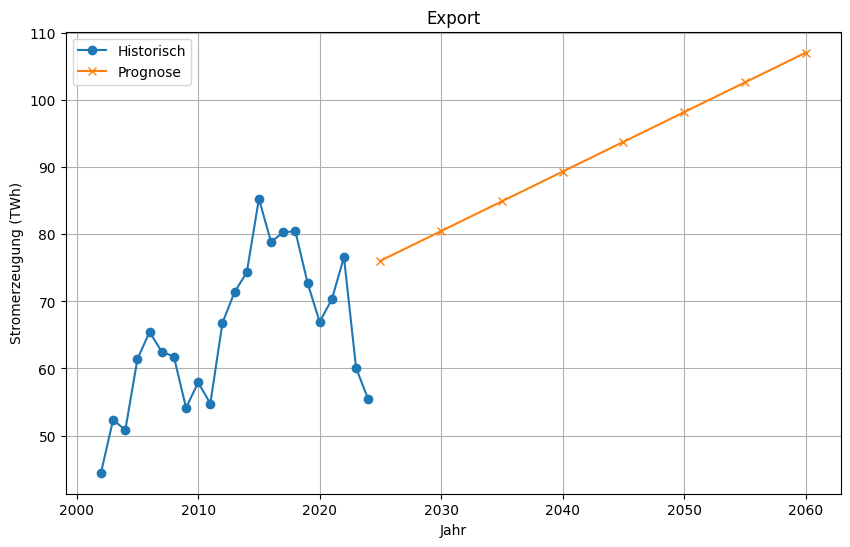

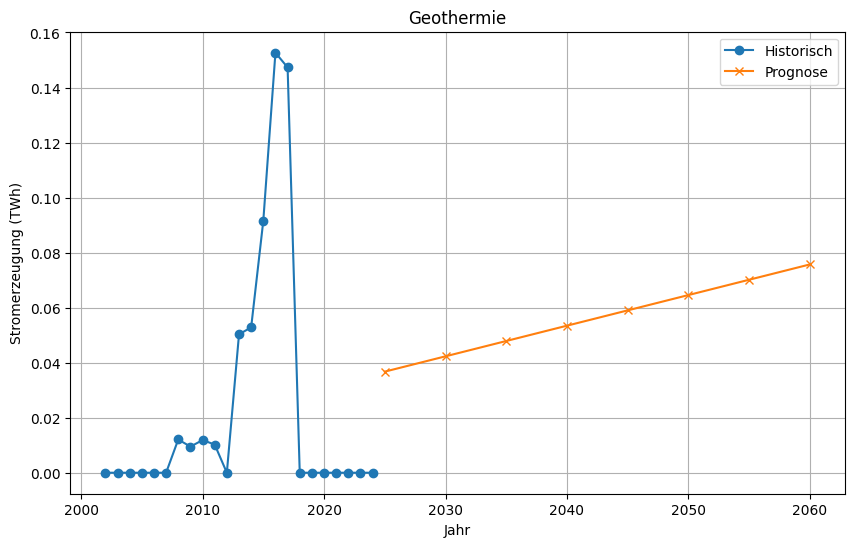

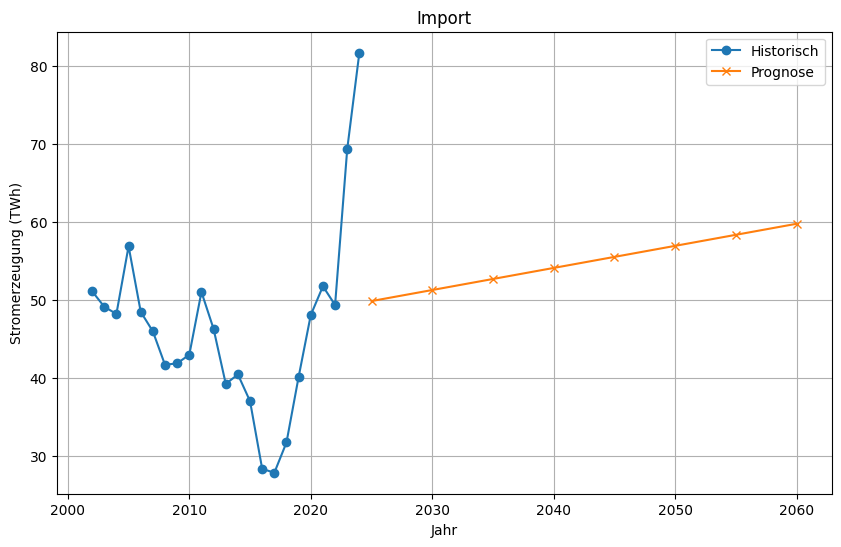

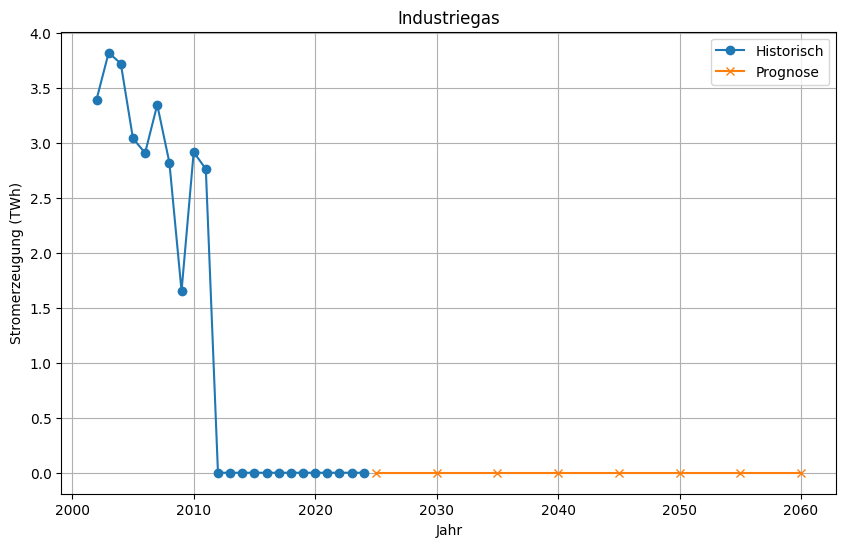

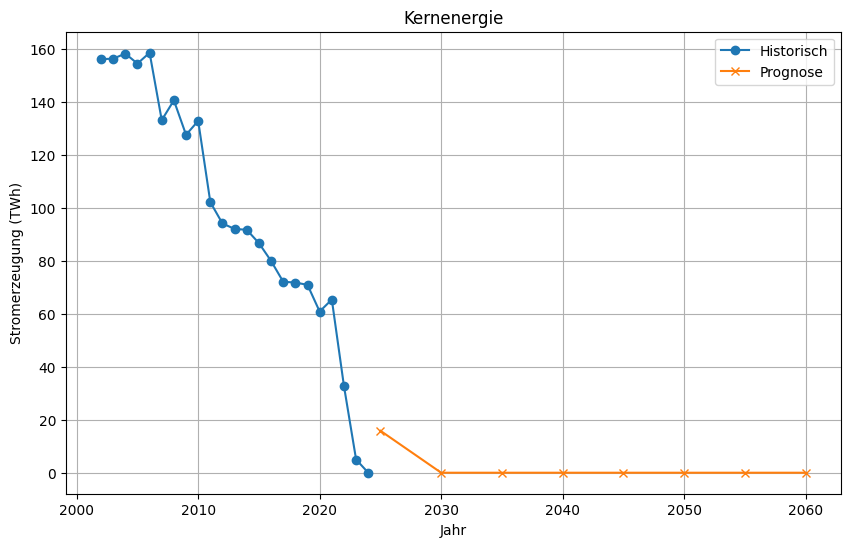

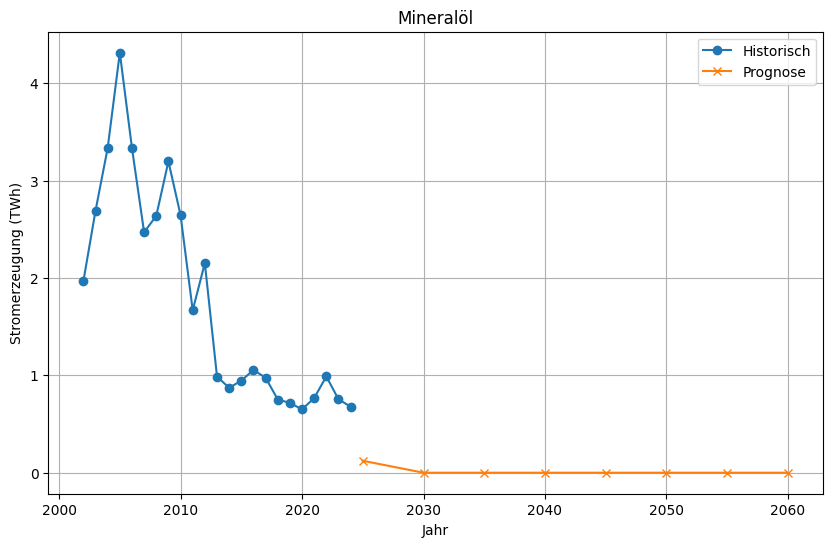

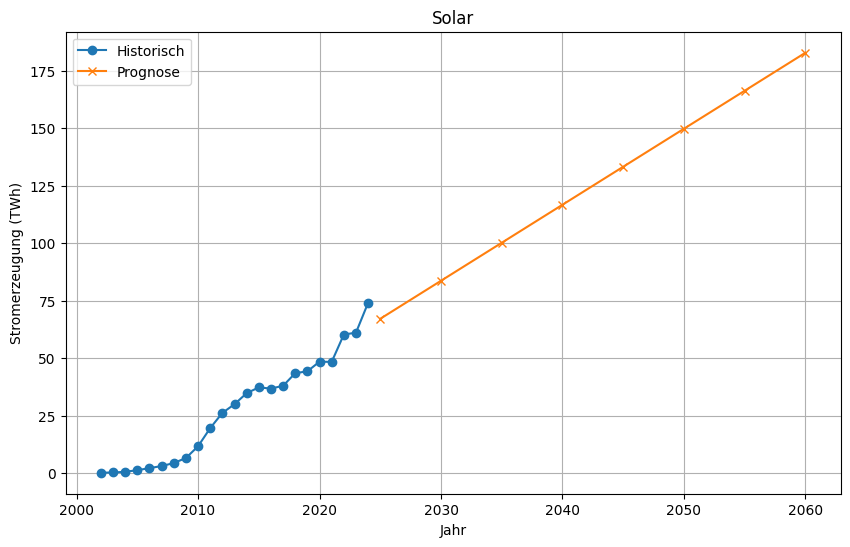

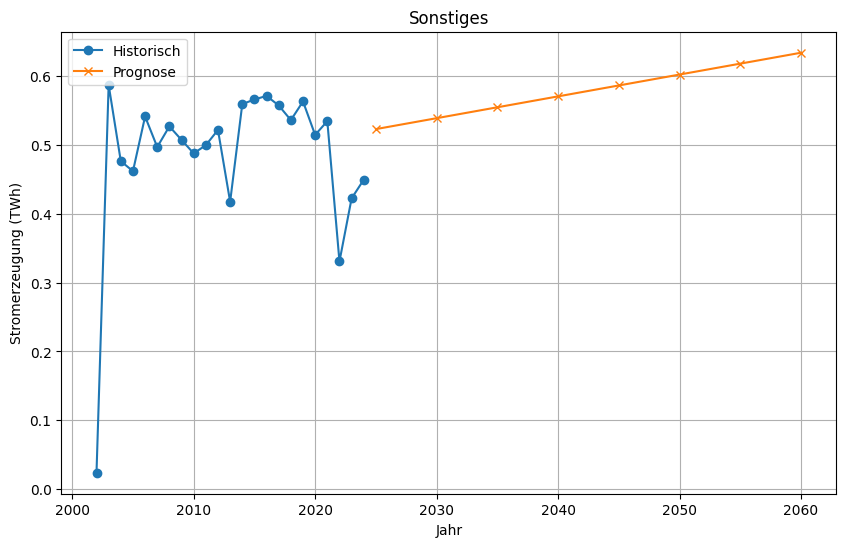

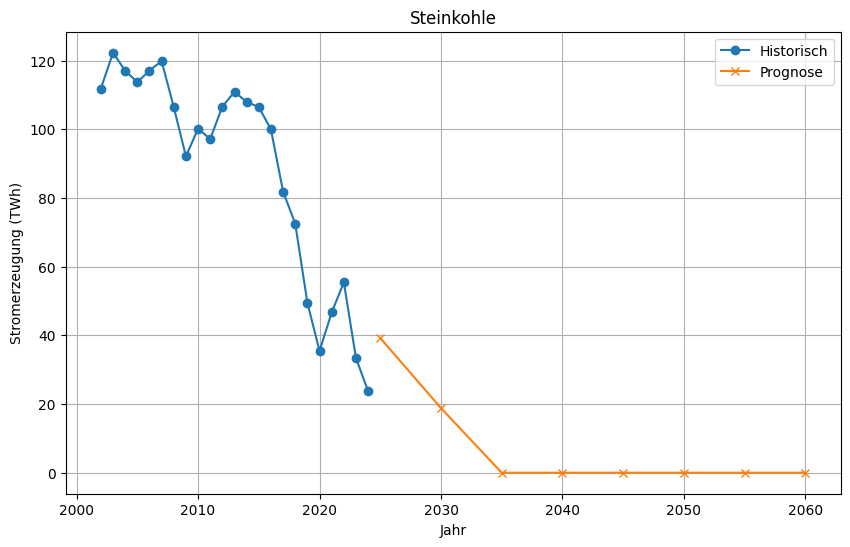

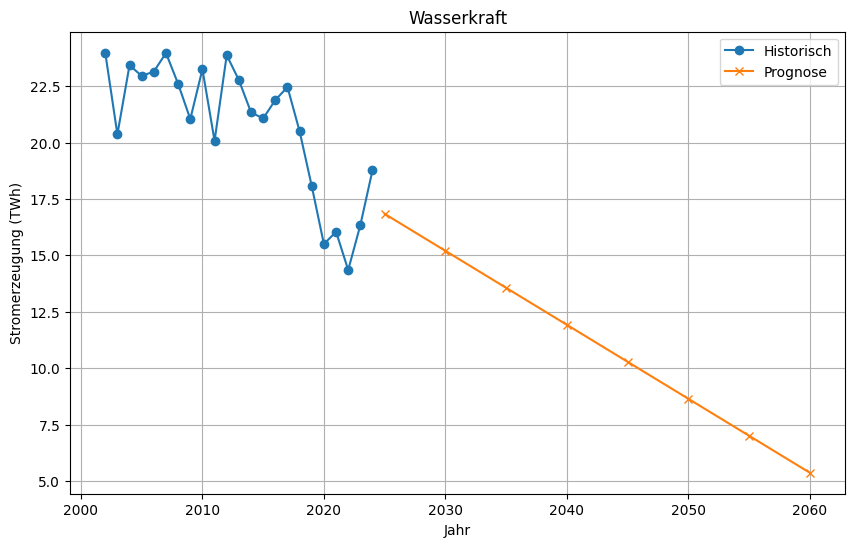

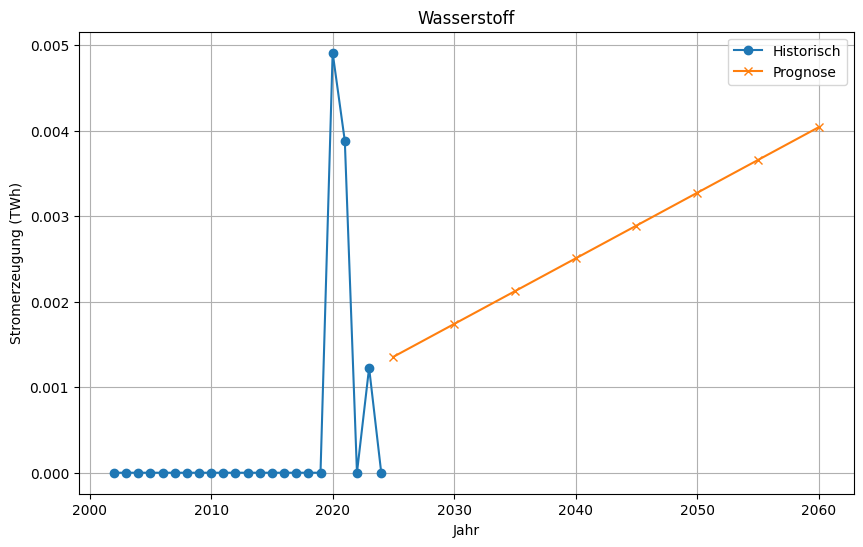

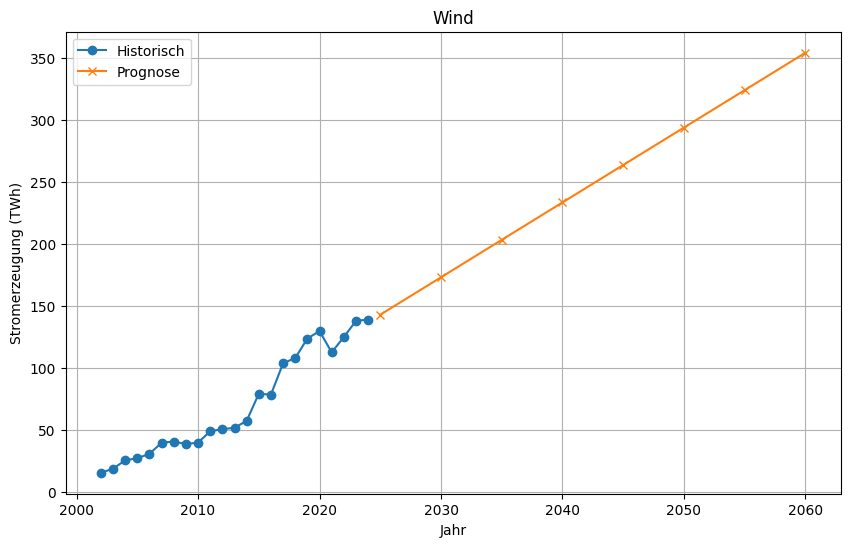

In [145]:

# # Plot each Kategorie
# categories = combined['Kategorie'].unique()
# n_cols = 2
# n_rows = (len(categories) + 1) // n_cols
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows), constrained_layout=True)

# for idx, category in enumerate(categories):
#     ax = axes.flatten()[idx]
#     cat_data = combined[combined['Kategorie'] == category]
#     for label, grp in cat_data.groupby('Type'):
#         ax.plot(grp['ds'], grp['value'], marker='o' if label == 'Historisch' else 'x', label=label)
#     ax.set_title(category)
#     ax.set_xlabel('Jahr')
#     ax.set_ylabel('Stromerzeugung (MWh)')
#     ax.legend()
#     ax.grid(True)

# # If there's an odd number of plots, hide the last empty subplot
# if len(categories) % n_cols != 0:
#     axes.flatten()[-1].axis('off')

# plt.suptitle('Strommix: Historische Daten und Prognosen pro Kategorie', fontsize=16)
# plt.show()
import os
import matplotlib.pyplot as plt

# Create output directory if not exists
output_dir = "plots"
os.makedirs(output_dir, exist_ok=True)

# Convert to TWh
combined_twh = combined.copy()
combined_twh["value"] = combined_twh["value"] / 1_000_000

# Get global y-axis limits for consistent scaling
y_min = combined_twh['value'].min()
y_max = combined_twh['value'].max()

# Plot and save each category
for category in combined_twh['Kategorie'].unique():
    cat_data = combined_twh[combined_twh['Kategorie'] == category]
    fig, ax = plt.subplots(figsize=(10, 6))

    for label, grp in cat_data.groupby('Type'):
        marker = 'o' if label == 'Historisch' else 'x'
        ax.plot(grp['ds'], grp['value'], marker=marker, label=label)

    ax.set_title(category)
    ax.set_xlabel('Jahr')
    ax.set_ylabel('Stromerzeugung (TWh)')
    # ax.set_ylim(y_min, y_max)
    ax.legend()
    ax.grid(True)

    # Save the plot
    filename = f"prediction_{category.lower().replace(' ', '_').replace('/', "_")}.png"
    fig.savefig(os.path.join(output_dir, filename), dpi=300, bbox_inches='tight')

    # Show in notebook
    plt.show()


In [72]:

# # Set forecasted Geothermie values to 0
# combined.loc[
#     (combined["Kategorie"] == "Geothermie") & (combined["Type"] == "Prognose"),
#     "value"
# ] = 0

# # Filter geothermal data
# geo_data = combined[combined["Kategorie"] == "Geothermie"]

# # Plot geothermal only
# fig, ax = plt.subplots(figsize=(8, 5))
# for label, grp in geo_data.groupby('Type'):
#     ax.plot(grp['ds'], grp['value'], marker='o' if label == 'Historisch' else 'x', label=label)

# ax.set_title("Geothermie")
# ax.set_xlabel("Jahr")
# ax.set_ylabel("Stromerzeugung (TWh)")
# ax.legend()
# ax.grid(True)

# plt.tight_layout()

# fig.savefig("plots/prediction_geothermie_corrected.png", dpi=300)

# plt.show()

In [73]:
import pandas as pd

# === CONFIG ===
kategorie_to_variable = {
    "Abfall": "Electricity generation|Wastes",  # Aggregated
    "Biomasse": "Electricity generation|Biomass",  # Top-level
    "Braunkohle": "Electricity generation|Coal|Fossil|Lignite",  
    "Erdgas": "Electricity generation|Gas|Fossil gases",  
    "Geothermie": "Electricity generation|Geothermal",  
    "Industriegas": "Electricity generation|Gas|Fossil gases|Industrial CHPs gas",  
    "Kernenergie": "Electricity generation|Nuclear Fuel|Nuclear power plants",
    "Mineralöl": "Electricity generation|Oil|Fossil liquids",  
    "Solar": "Electricity generation|Solar",  
    "Sonstiges": "Electricity generation|Other",  
    "Steinkohle": "Electricity generation|Coal|Fossil|Hard coal",  
    "Wasserkraft": "Electricity generation|Hydro",  
    "Wind": "Electricity generation|Wind" ,
    
    "Wasserstoff": "Electricity generation|Hydrogen", # todo to be added

}

target_years = [2005, 2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060]

# === Step 1: Filter combined dataset ===
df_filtered = combined[combined['ds'].dt.year.isin(target_years)].copy()

# Convert MWh to PJ
df_filtered['PJ'] = df_filtered['value'] * 3.6 / 1_000_000
df_filtered['year'] = df_filtered['ds'].dt.year

# Map Kategorie → IAM variable name
df_filtered['variable'] = df_filtered['Kategorie'].map(kategorie_to_variable)

# Drop rows with unmapped variables (optional safety)
df_filtered = df_filtered.dropna(subset=['variable'])

# === Step 2: Pivot to wide format ===
pivot = df_filtered.pivot_table(
    index="variable",
    columns="year",
    values="PJ",
    aggfunc="sum"
).reset_index()

# === Step 3: Add SWEET/Premise metadata columns ===
pivot["scenario"] = "Base"
pivot["region"] = "DE"
pivot["unit"] = "PJ/yr."

# Reorder columns to match SWEET structure
export_columns = ["scenario", "region", "variable", "unit"] + target_years
final_export = pivot[export_columns]

# === Step 4: Export to CSV ===
final_export.to_csv("electricity_generation_sps1_DE.csv", index=False)

# Optional: Display preview
display(final_export)


year,scenario,region,variable,unit,2005,2010,2015,2020,2025,2030,2035,2040,2045,2050,2055,2060
0,Base,DE,Electricity generation|Biomass,PJ/yr.,8.399891,14.995811,22.69251,30.394933,35.406992,42.348039,49.289087,56.230134,63.174983,70.116031,77.057078,83.998125
1,Base,DE,Electricity generation|Coal|Fossil|Hard coal,PJ/yr.,409.381387,360.56196,383.358622,127.665234,141.147137,67.686188,0.0,0.0,0.0,0.0,0.0,0.0
2,Base,DE,Electricity generation|Coal|Fossil|Lignite,PJ/yr.,498.355394,469.723579,501.931757,295.659371,336.956735,289.721039,242.485343,195.249648,147.988084,100.752388,53.516693,6.280997
3,Base,DE,Electricity generation|Gas|Fossil gases,PJ/yr.,188.322768,227.128702,108.443635,205.546316,168.277809,164.67539,161.072971,157.470553,153.866161,150.263743,146.661324,143.058906
4,Base,DE,Electricity generation|Gas|Fossil gases|Indust...,PJ/yr.,10.943503,10.494652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Base,DE,Electricity generation|Geothermal,PJ/yr.,0.0,0.042689,0.329515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Base,DE,Electricity generation|Hydro,PJ/yr.,82.620094,83.698736,75.845772,55.805998,60.621451,54.722252,48.823053,42.923854,37.021425,31.122226,25.223027,19.323828
7,Base,DE,Electricity generation|Hydrogen,PJ/yr.,0.0,0.0,0.0,0.017683,0.004882,0.006262,0.007642,0.009022,0.010403,0.011783,0.013164,0.014544
8,Base,DE,Electricity generation|Nuclear Fuel|Nuclear po...,PJ/yr.,556.604262,478.69434,312.354025,219.29157,57.108248,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Base,DE,Electricity generation|Oil|Fossil liquids,PJ/yr.,15.529709,9.521636,3.404804,2.342794,0.441688,0.0,0.0,0.0,0.0,0.0,0.0,0.0


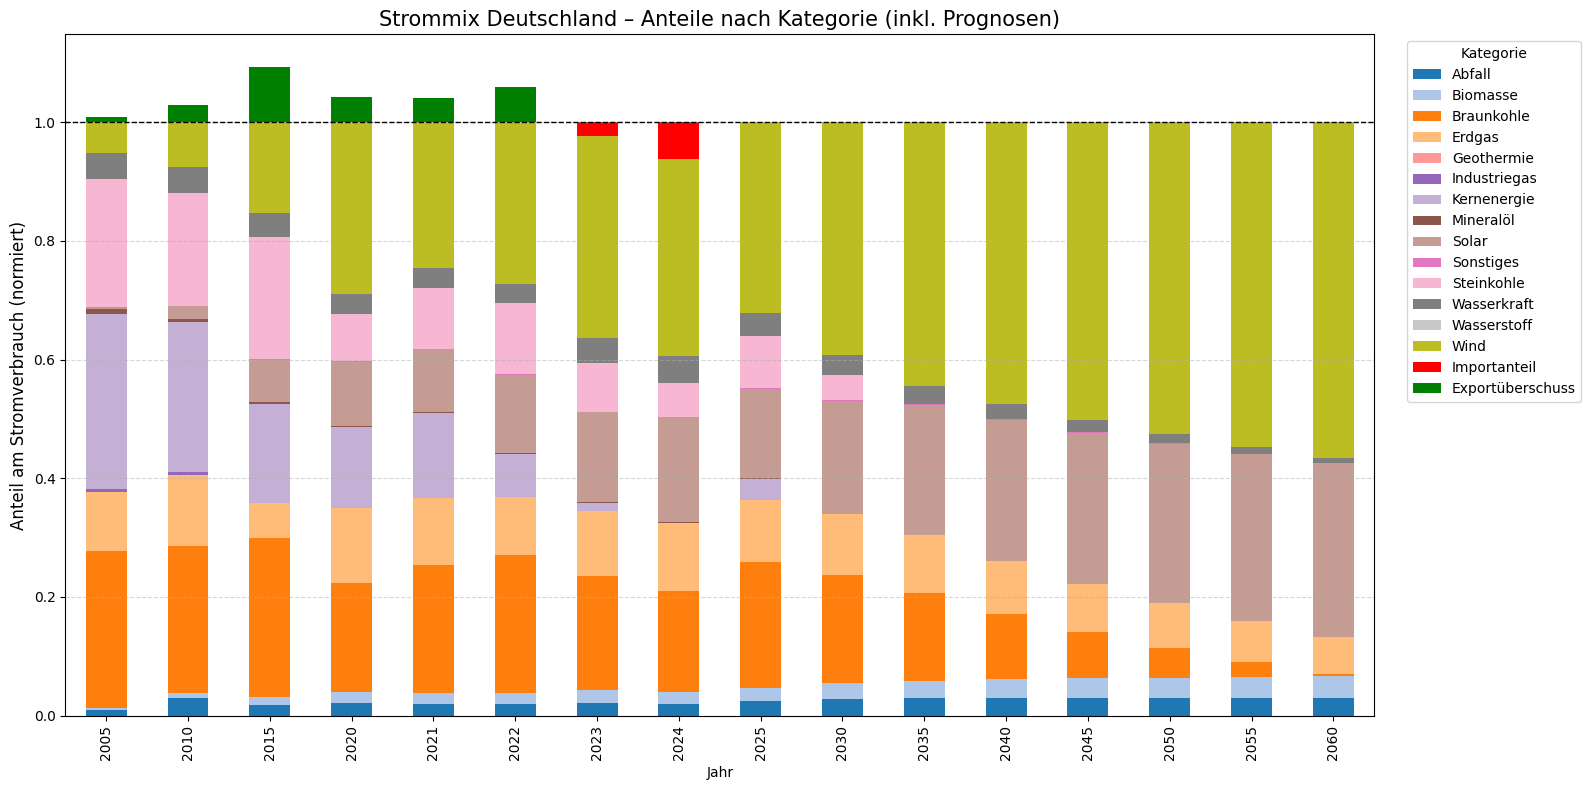

In [70]:
import matplotlib.pyplot as plt

# === Define your target years (historical + forecast)
target_years = [2005, 2010, 2015, 2020, 2021, 2022, 2023, 2024, 2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060]

# === Step 1: Prepare production data (historical + forecast)
prod_combined = combined[combined['Kategorie'].isin(include_kategorien)].copy()
prod_combined["Jahr"] = prod_combined["ds"].dt.year
prod_combined = prod_combined[["Jahr", "Kategorie", "value", "Type"]]

# === Step 2: Historical Import/Export (2002–2024)
saldo_df = strommix_gesamt[strommix_gesamt["Typ"] == "Austauschsaldo"].copy()
saldo_df = saldo_df[(saldo_df["Jahr"] >= 2002) & (saldo_df["Jahr"] <= 2024)]
saldo_df = saldo_df[["Jahr", "Elektrizitätserzeugung (netto)"]].rename(columns={"Elektrizitätserzeugung (netto)": "Austauschsaldo"})

# === Step 3: Inlandsproduktion for historical years
historical_prod = prod_combined[prod_combined["Type"] == "Historisch"]
inlandsproduktion = historical_prod.groupby("Jahr")["value"].sum().reset_index().rename(columns={"value": "Inlandsproduktion"})

# === Step 4: Basis historical = production + saldo
basis = inlandsproduktion.merge(saldo_df, on="Jahr", how="left").fillna(0)

# === Step 5: Anteil berechnen für historische Daten
historical_merged = historical_prod.merge(basis, on="Jahr", how="left")
historical_merged["Anteil"] = historical_merged["value"] / (
    historical_merged["Inlandsproduktion"] + historical_merged["Austauschsaldo"].clip(lower=0)
)

# === Step 6: Forecast Anteile berechnen (ohne Import/Export)
forecast = prod_combined[prod_combined["Type"] == "Prognose"].copy()
forecast_total = forecast.groupby("Jahr")["value"].sum().reset_index().rename(columns={"value": "Inlandsproduktion"})
forecast = forecast.merge(forecast_total, on="Jahr")
forecast["Anteil"] = forecast["value"] / forecast["Inlandsproduktion"]

# === Step 7: Import/Export (nur historische Jahre)
import_df = basis[basis["Austauschsaldo"] > 0].copy()
import_df["Anteil"] = import_df["Austauschsaldo"] / (import_df["Inlandsproduktion"] + import_df["Austauschsaldo"])
import_df["Kategorie"] = "Importanteil"

export_df = basis[basis["Austauschsaldo"] < 0].copy()
export_df["Anteil"] = -export_df["Austauschsaldo"] / export_df["Inlandsproduktion"]
export_df["Kategorie"] = "Exportüberschuss"

# === Step 8: Combine all + filter to target_years
final_rel = pd.concat([
    historical_merged[["Jahr", "Kategorie", "Anteil"]],
    forecast[["Jahr", "Kategorie", "Anteil"]],
    import_df[["Jahr", "Kategorie", "Anteil"]],
    export_df[["Jahr", "Kategorie", "Anteil"]]
])
final_rel = final_rel[final_rel["Jahr"].isin(target_years)]

# === Step 9: Pivot für Stacked Bar Plot
pivot_plot = final_rel.pivot_table(
    index="Jahr",
    columns="Kategorie",
    values="Anteil",
    aggfunc="sum"
).fillna(0)

# Export/Import at end
cols = list(pivot_plot.columns)
for special in ["Importanteil", "Exportüberschuss"]:
    if special in cols:
        cols = [c for c in cols if c != special] + [special]
pivot_plot = pivot_plot[cols]

# === Step 10: Farben und Plot
tab20_colors = plt.get_cmap("tab20").colors
safe_colors = [c for i, c in enumerate(tab20_colors) if i not in [4,5,6]]
categories = list(pivot_plot.columns)

# Custom color assignment
color_map = {}
for i, cat in enumerate(categories):
    if cat == "Importanteil":
        color_map[cat] = "red"
    elif cat == "Exportüberschuss":
        color_map[cat] = "green"
    else:
        color_map[cat] = safe_colors[i % len(safe_colors)]

colors = [color_map[cat] for cat in categories]

# Plot
pivot_plot.plot(
    kind="bar",
    stacked=True,
    figsize=(16, 8),
    color=colors
)

plt.axhline(1, color='black', linestyle='--', linewidth=1)
plt.title("Strommix Deutschland – Anteile nach Kategorie (inkl. Prognosen)", fontsize=15)
plt.ylabel("Anteil am Stromverbrauch (normiert)", fontsize=12)
plt.xlabel("Jahr")
plt.legend(title="Kategorie", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [71]:

# https://premise.readthedocs.io/en/latest/mapping.html
# MAPPINGS: https://github.com/polca/premise/blob/master/premise/iam_variables_mapping/electricity_variables.yaml